# このスクリプトは金額をシュミレーションするものである

# モジュールインポート

In [16]:
# scikitlearnのアルゴリズムのロード
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 

# scikit learnの精度測定ツールの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scikit learnの精度測定ツールの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pandas(pd) とNumpy(np)のモジュール
import numpy as np
import pandas as pd
import sys,os,random
import warnings
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline

# 前処理済みファイルのロード

In [17]:
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_pickle("data/df_test.pkl")

loc_result=df.columns.get_loc('result')
loc_Date  =df.columns.get_loc('Date')
loc_open  =df.columns.get_loc('Open')
loc_close =df.columns.get_loc('Close')
display(df.tail(3))

,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,day+47,day+48,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result
4933,2020-11-04,23619.580078,23695.230469,1.012578,2.201746,1.281561,1.937012,1.056667,1.037856,0.420057,0.258372,0.399523,0.017194,0.134437,0.322340,0.601317,0.302062,0.313943,-0.204160,0.130740,-0.397570,0.481743,1.491596,0.851875,1.570897,1.394214,1.874711,0.599393,0.893104,0.973066,1.732542,1.742753,1.607551,1.279483,0.866739,0.829659,0.771156,0.804143,2.184544,1.837195,2.841871,2.048389,2.115231,0.404216,1.541158,2.295183,2.041027,1.666986,1.323583,1.558793,1.621323,3.082856,2.592306,2.677844,2.703071,2.259000,1.854719,1.267626,2.145972,3.834017,4.950211,5.285783,5.108063,5.070612,5.540010,7.618152,6.071561,5.026136,4.771534,3.890740,4.994814,3.632148,3.642921,3.721707,3.560264,3.106427,3.513336,4.364248,4.549301,4.813005,5.245805,5.061785,4.281165,6.074798,6.477578,5.735796,5.750950,6.131324,5.329965,5.975048,4.784925,4.344924,5.663005,4.902480,1
4934,2020-11-05,23776.199219,24105.279297,1.012170,0.663090,2.879436,1.953149,2.612946,1.726764,1.707828,1.085933,0.923176,1.065263,0.680399,0.798419,0.987567,1.268395,0.967155,0.979115,0.457577,0.794697,0.262884,1.148028,2.164577,1.520614,2.244404,2.066549,2.550232,1.266457,1.562116,1.642608,2.407121,2.417399,2.281300,1.951057,1.535576,1.498251,1.439360,1.472565,2.862120,2.512468,3.523806,2.725062,2.792347,1.069987,2.214468,2.973492,2.717651,2.341130,1.995450,2.232220,2.295164,3.766388,3.272585,3.358691,3.384085,2.937069,2.530107,1.939122,2.823292,4.522530,5.646126,5.983922,5.805024,5.767325,6.239836,8.331757,6.774911,5.722554,5.466264,4.579630,5.691025,4.319323,4.330167,4.409476,4.246962,3.790116,4.199723,5.056277,5.242558,5.508010,5.943680,5.758439,4.972644,6.778170,7.183621,6.436919,6.452175,6.835071,6.028397,6.677759,5.479743,5.036825,6.363646,1
4935,2020-11-06,24076.220703,24325.230469,1.010925,1.261856,1.933314,4.177627,3.239652,3.907774,3.010410,2.991235,2.361492,2.196681,2.340561,1.950841,2.070350,2.261885,2.546257,2.241215,2.253326,1.725207,2.066581,1.528057,2.424371,3.453747,2.801659,3.534581,3.354482,3.844269,2.544295,2.843684,2.925192,3.699351,3.709760,3.571943,3.237533,2.816810,2.779013,2.719379,2.753003,4.160092,3.806028,4.830127,4.021305,4.089439,2.345345,3.504268,4.272870,4.013801,3.632528,3.282486,3.522243,3.585982,5.075771,4.575737,4.662929,4.688644,4.235987,3.823890,3.225447,4.120774,5.841454,6.979228,7.321287,7.140132,7.101957,7.580430,9.698749,8.122257,7.056621,6.797097,5.899274,7.024694,5.635683,5.646664,5.726973,5.562409,5.099798,5.514574,6.381937,6.570567,6.839370,7.280537,7.092959,6.297248,8.125557,8.536124,7.780001,7.795448,8.183176,7.366323,8.023879,6.810746,6.362238,1


In [18]:
#トレーニングデータと正解ラベルに分割
testX=df.iloc[:,loc_open:loc_result].as_matrix()
# 正解データ
testY=df.iloc[:,loc_result].as_matrix()
#データサンプル数の確認
print("　 　 テストデータ",testX.shape)

　 　 テストデータ (970, 93)


# sckit-learnの準備


In [19]:
# 保存したモデルをロードする
filename = 'model/sk-learn_model_20201107.sav'
classifier = pickle.load(open(filename, 'rb'))
display(classifier)
#　分類器の正答率を求める
pre=classifier.predict(testX)
ac_score=accuracy_score(testY,pre)
print("精度：{:.2%}".format(ac_score))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

精度：78.87%


In [20]:
#予測計算
df['predict']=np.argmax(classifier.predict_proba(testX),axis=1)
# １は買い、０は売りに変換
df['predict']=df['predict'].apply(lambda x: "買" if x==1  else "売")

def check_asnswer(row):
    if row['predict']=="売" and row['result']==0:
        return "○"
    if row['predict']=="売" and row['result']==1:
        return "×"
    if row['predict']=="買" and row['result']==1:
        return "○"
    if row['predict']=="買" and row['result']==0:
        return "×"
    return "-"
df['正誤'] = df.apply(check_asnswer, axis=1)
df['正誤'].value_counts()

○    765
×    205
Name: 正誤, dtype: int64

# シミュレーション

In [21]:
df_num=df.as_matrix()   #numpyへ変換
close_index=df.columns.get_loc('Close')
open_index= df.columns.get_loc('Open')
date_index= df.columns.get_loc('Date')

MONEY=1000000
LEN=len(df_num)

start=len(df_num)-len(testX)
end=len(df_num)-1
print("start:",df_num[start,0],"〜end:",df_num[end,0])

standard=1000000/df_num[start,1]  
DATE=df['Date'].values[0]
result_out=""

start: 2016-10-03 00:00:00 〜end: 2020-11-06 00:00:00


In [30]:
MONEY=1000000
df['MONEY']=str("{:,}".format(MONEY))
money_index= df.columns.get_loc('MONEY')

for i,row in enumerate(df.iterrows()): 
    row=row[1]
    profit_rate=row['Close']/row['Open']
    if profit_rate==0:
        profit_rate=1
    if row['predict']=="買":
        df.iloc[i,money_index]=MONEY*profit_rate
    else:
        df.iloc[i,money_index]=MONEY/profit_rate   
    MONEY=int(df.iloc[i,money_index])

In [31]:
df[['Date','Open','Close','dow_compare','MONEY']]

,Date,Open,Close,dow_compare,MONEY
3966,2016-10-03,16566.029297,16598.669922,1.006949,1.00197e+06
3967,2016-10-04,16661.509766,16735.650391,0.998591,1.00643e+06
3968,2016-10-05,16787.890625,16819.240234,0.994568,1.00455e+06
3969,2016-10-06,16913.599609,16899.099609,1.004149,1.00541e+06
3970,2016-10-07,16883.119141,16860.089844,0.999348,1.00679e+06
...,...,...,...,...,...
4931,2020-10-30,23320.710938,22977.130859,1.006727,7.99412e+07
4932,2020-11-02,23110.740234,23295.480469,0.997340,8.05802e+07
4933,2020-11-04,23619.580078,23695.230469,1.012578,8.03229e+07
4934,2020-11-05,23776.199219,24105.279297,1.012170,8.14346e+07


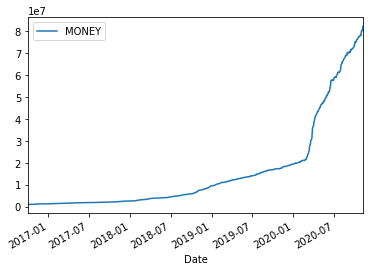

In [32]:
df.plot("Date","MONEY")

In [34]:
df_sim = pd.DataFrame( )
MONEY=1000000
DATE=""
for i,row in df.iterrows(): 

    profit_rate=0
    DATE2=str(row['Date'])
    if DATE != DATE2[:7]:       #月初の定点観測
        DATE=DATE2[:7]
        print()
        result_out=result_out+"\n"
        if DATE2[5:7]=="01":
            print("-"*80)
            result_out=result_out+"-"*80+"\n"
        STRING=DATE2[:7]+":金"+"{:,}".format(int(MONEY))+"(基"+"{:,}".format(int(standard*row["Open"])).strip()+")"
        print(STRING.strip(),end="")
        result_out=result_out+STRING.strip()+"\n"

        
    PREDICT    ="None"
    profit_rate=row['Close']/row['Open']
    print("{}{}".format(row["predict"],row["正誤"]),end=",")
    if profit_rate==0:
        profit_rate=1
    #  買い予測の場合(1)
    if row["predict"]=="買":
        MONEY=MONEY*profit_rate

    #  売り予測の場合(0)
    if row["predict"]=="売":
        MONEY=MONEY/profit_rate

    Y_result="None"
    if row['result']==1:    
        Y_result="buy"
    elif row['result']==0:
        Y_result="sell"

    if profit_rate!=0:
        profit_rate=100*(profit_rate-1)
    df_sim=df_sim.append(
             {"Date":row['Date'],
            'Open':round(row['Open'], 2),    
            'Close':round(row['Close'],2),   
            'Up':round(profit_rate*100,2), 
            'money':round(MONEY),
            '基準価格':int(standard*row['Open']),   
            'result':Y_result,
            'predict':row["predict"],
            '正誤':row['正誤'],
            '利益率':round(profit_rate,2)}
            ,ignore_index=True)


2016-10:金1,000,000(基1,000,000)買○,買○,売×,売○,売○,買○,売○,売○,買○,売×,買○,売×,買○,売○,売×,買○,買○,売○,売○,買○,
2016-11:金1,061,522(基1,049,167)買○,売○,売○,売×,売○,売○,買○,売○,買○,売○,売×,買○,売○,売×,買○,売×,売×,売×,売○,
2016-12:金1,230,321(基1,118,870)売○,売○,売○,売○,売×,売×,買○,売○,買○,売○,売○,売○,売×,買○,売○,売×,売×,売×,売○,買○,
--------------------------------------------------------------------------------
2017-01:金1,288,712(基1,164,955)買○,売○,売×,売○,売×,売○,買○,売○,買○,売○,売×,売○,売○,売○,買○,売×,売○,売○,
2017-02:金1,374,728(基1,142,517)買○,売○,売○,売○,買○,売×,売○,買○,売○,売○,売○,売○,売×,買○,売○,売○,売×,売○,売○,
2017-03:金1,478,589(基1,160,624)買○,売○,売○,売○,売×,売○,売○,買○,買○,売○,売×,買○,売×,売×,売○,売×,買○,売○,売×,売×,売○,売○,
2017-04:金1,580,448(基1,146,201)売○,売○,売○,売○,売○,売○,売×,売○,買○,売○,売○,買○,売○,買○,売○,買○,買○,売×,売○,
2017-05:金1,682,477(基1,156,223)買○,買○,買○,売○,売×,売×,売○,買○,売○,売×,売○,売○,売×,売○,売○,買○,売○,売○,売×,
2017-06:金1,765,330(基1,188,707)買○,買○,売×,売○,売×,売○,売×,売○,売×,売○,売×,売×,買○,売○,売○,売○,売○,売×,売○,売○,売○,売×,
2017-07:金1,838,529(基1,210,689)売○,売○,売○,売×,売×,買○,売○,売○,売○,売○,売×,買○,売×,売×,売○,売○,売×,売○,売○,
2017-08:金1,898,76

In [35]:
df_sim[(
    df_sim['Date'].astype(str).str.contains('01-04') |
    df_sim['Date'].astype(str).str.contains('04-01') |
    df_sim['Date'].astype(str).str.contains('07-01') |
    df_sim['Date'].astype(str).str.contains('10-01') 
)]

,Close,Date,Open,Up,money,predict,result,利益率,基準価格,正誤
59,19594.16,2017-01-04,19298.68,153.11,1308444.0,買,buy,1.53,1164955.0,○
299,23506.33,2018-01-04,23073.73,187.49,2598188.0,買,buy,1.87,1392834.0,○
477,24245.76,2018-10-01,24173.37,29.95,5785820.0,売,buy,0.30,1459213.0,×
537,19561.96,2019-01-04,19655.13,-47.40,9502591.0,売,sell,-0.47,1186472.0,○
593,21509.03,2019-04-01,21500.89,3.79,12014405.0,売,buy,0.04,1297890.0,×
650,21729.97,2019-07-01,21566.27,75.91,14117465.0,買,buy,0.76,1301836.0,○
710,21885.24,2019-10-01,21831.44,24.64,16836880.0,売,buy,0.25,1317843.0,×
826,18065.41,2020-04-01,18686.12,-332.18,38524342.0,売,sell,-3.32,1127978.0,○
885,22121.73,2020-07-01,22338.30,-96.95,59000987.0,売,sell,-0.97,1348440.0,○
944,23184.93,2020-10-01,23184.93,0.00,74417443.0,売,sell,0.00,1399546.0,○


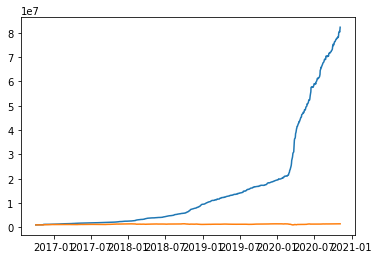

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

#df_sim.plot(x='Date',y='money',title='Money/Date')

plt.plot(df_sim['Date'],df_sim['money'])
plt.plot(df_sim['Date'],df_sim['基準価格'])
plt.show()

In [39]:
print("○",df_sim[df_sim['正誤']=="○"].shape[0],"回 勝ち")
print("X",df_sim[df_sim['正誤']=="×"].shape[0],"回 負け")

df_year=pd.DataFrame()
for i in range(7,21):
    YEAR=str(i+2000)
    start_day=YEAR+"-01-01"
    end_day=YEAR+"-12-31"

    tmp=df_sim.query("Date >= @start_day and Date <= @end_day ")
    
    if tmp.shape[0]==0:
        continue
    year_start=tmp['money'].head(1).values[0]
    year_end  =tmp['money'].tail(1).values[0]

    win_rate  =tmp[tmp["正誤"]=="○"].shape[0]/tmp.shape[0]
    df_year=df_year.append(
    {
    "年":YEAR,
    "利益率" :str(round( year_end/year_start*100,1))+"%",
    "年初値" :int(year_start),
     "年末値":int( year_end),
     "勝率"  :str(round(win_rate*100,1))+"%"
        },ignore_index=True)
df_year[["年","勝率",    "年初値","年末値","利益率" ]]

○ 765 回 勝ち
X 205 回 負け


,年,勝率,年初値,年末値,利益率
0,2016,72.9%,1001970.0,1288713.0,128.6%
1,2017,75.0%,1308444.0,2550372.0,194.9%
2,2018,83.2%,2598188.0,9457547.0,364.0%
3,2019,75.1%,9502591.0,19433678.0,204.5%
4,2020,84.5%,19529906.0,82287848.0,421.3%


In [40]:
df_sim.tail(30)

,Close,Date,Open,Up,money,predict,result,利益率,基準価格,正誤
940,23204.62,2020-09-25,23217.33,-5.47,72713023.0,売,sell,-0.05,1401502.0,○
941,23511.62,2020-09-28,23391.96,51.15,73084976.0,買,buy,0.51,1412043.0,○
942,23539.10,2020-09-29,23410.50,54.93,73486449.0,買,buy,0.55,1413163.0,○
943,23185.12,2020-09-30,23478.85,-125.10,74417443.0,売,sell,-1.25,1417288.0,○
944,23184.93,2020-10-01,23184.93,0.00,74417443.0,売,sell,0.00,1399546.0,○
945,23029.90,2020-10-02,23294.80,-113.72,75273427.0,売,sell,-1.14,1406178.0,○
946,23312.14,2020-10-05,23254.28,24.88,75086596.0,売,buy,0.25,1403732.0,×
947,23433.73,2020-10-06,23420.07,5.83,75042826.0,売,buy,0.06,1413740.0,×
948,23422.82,2020-10-07,23272.45,64.61,75527703.0,買,buy,0.65,1404829.0,○
949,23647.07,2020-10-08,23506.34,59.87,75979881.0,買,buy,0.60,1418948.0,○
